In [1]:
import pandas as pd

# Прочитання CSV-файлу
df = pd.read_csv('bestsellers with categories.csv')

# Виведення перших п'яти рядків
print(df.head())

# Виведення розмірів датасету
print(df.shape)

# Кількість книг у датасеті
number_of_books = df.shape[0]
print(f"Про {number_of_books} книг зберігає дані датасет")


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
Про 550 книг зберігає дані датасет


In [2]:
# Зміна назв колонок на snake_case
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.columns)


Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Чи є в якихось змінних пропуски? Ні
Унікальні жанри: ['Non Fiction' 'Fiction']


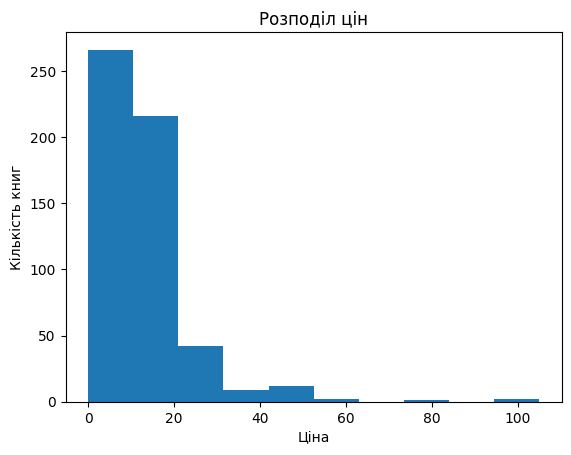

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [3]:
# Перевірка на пропуски у кожному стовпці
missing_values = df.isna().sum()
print(missing_values)

# Відповідь: Чи є в якихось змінних пропуски? 
are_there_missing_values = missing_values.any()
print(f"Чи є в якихось змінних пропуски? {'Так' if are_there_missing_values else 'Ні'}")

# Унікальні значення в колонці genre
unique_genres = df['genre'].unique()
print(f"Унікальні жанри: {unique_genres}")

# Розподіл цін: діаграма
import matplotlib.pyplot as plt

df['price'].plot(kind='hist')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()

# Максимальна, мінімальна, середня, медіанна ціна
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")


In [4]:
# Найвищий рейтинг у датасеті
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг у датасеті: {max_rating}")

# Кількість книг з найвищим рейтингом
num_books_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Скільки книг мають такий рейтинг: {num_books_max_rating}")

# Книга з найбільшою кількістю відгуків
book_most_reviews = df.loc[df['reviews'].idxmax()]
print(f"Книга з найбільшою кількістю відгуків: {book_most_reviews['name']}")

# Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році
most_expensive_2015 = df[df['year'] == 2015].sort_values(by='price', ascending=False).iloc[0]
print(f"Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році: {most_expensive_2015['name']}")

# Кількість книг жанру Fiction у Топ-50 у 2010 році
fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(f"Кількість книг жанру Fiction у Топ-50 у 2010 році: {fiction_2010}")

# Кількість книг з рейтингом 4.9 у 2010 та 2011 роках
books_49_rating = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {books_49_rating}")

# Сортування книг за зростанням ціни у 2015 році, дешевше за 8 доларів
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book = sorted_books_2015_under_8.iloc[-1]['name']
print(f"Книга остання у відсортованому списку: {last_book}")


Найвищий рейтинг у датасеті: 4.9
Скільки книг мають такий рейтинг: 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition
Кількість книг жанру Fiction у Топ-50 у 2010 році: 20
Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1
Книга остання у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [5]:
# Максимальна та мінімальна ціни для кожного з жанрів
price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
print(f"Максимальна ціна для жанру Fiction: {price_stats.loc['Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Fiction: {price_stats.loc['Fiction', 'min']}")
print(f"Максимальна ціна для жанру Non Fiction: {price_stats.loc['Non Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Non Fiction: {price_stats.loc['Non Fiction', 'min']}")

# Кількість книг для кожного автора
author_book_count = df.groupby('author')['name'].agg('count').reset_index().rename(columns={'name': 'book_count'})
print(f"Розмірність таблиці: {author_book_count.shape}")
max_books_author = author_book_count.loc[author_book_count['book_count'].idxmax()]
print(f"Автор з найбільшою кількістю книг: {max_books_author['author']}")
print(f"Скільки книг цього автора: {max_books_author['book_count']}")

# Середній рейтинг для кожного автора
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').reset_index()
min_avg_rating_author = author_avg_rating.loc[author_avg_rating['user_rating'].idxmin()]
print(f"Автор з найнижчим середнім рейтингом: {min_avg_rating_author['author']}")
print(f"Середній рейтинг цього автора: {min_avg_rating_author['user_rating']}")

# З'єднання двох датафреймів (кількість книг та середній рейтинг)
author_stats = pd.concat([author_book_count.set_index('author'), author_avg_rating.set_index('author')], axis=1)
# Сортування за зростанням кількості книг та зростаючим рейтингом
sorted_author_stats = author_stats.sort_values(by=['book_count', 'user_rating'])

first_author = sorted_author_stats.index[0]
print(f"Перший автор у списку: {first_author}")



Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0
Розмірність таблиці: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney
Скільки книг цього автора: 12
Автор з найнижчим середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9
Перший автор у списку: Muriel Barbery


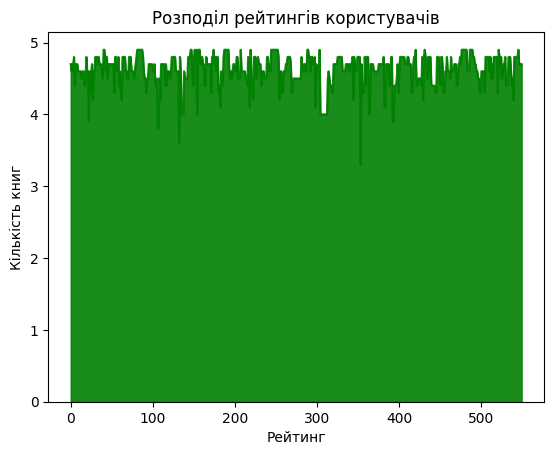

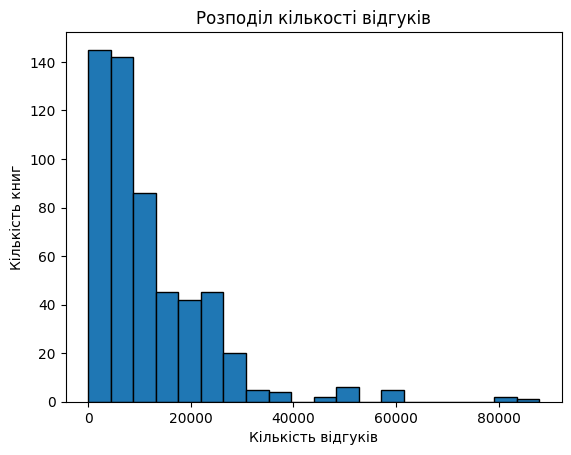

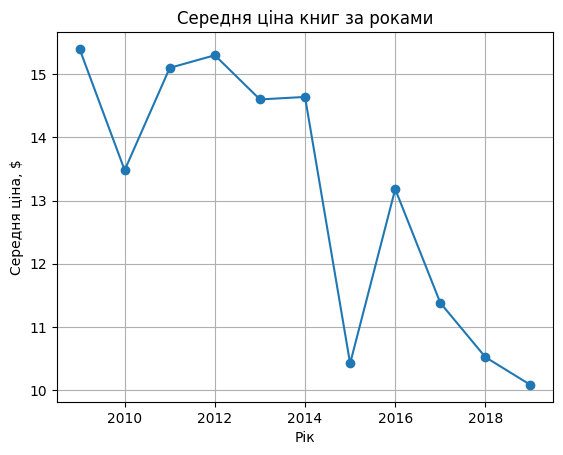

In [24]:
# Розподіл рейтингів користувачів
df['user_rating'].plot(kind='area', color='green', alpha=0.9)
plt.title('Розподіл рейтингів користувачів')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()

# Розподіл кількості відгуків
df['reviews'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Розподіл кількості відгуків')
plt.xlabel('Кількість відгуків')
plt.ylabel('Кількість книг')
plt.show()

# Ціна книг за роками
df.groupby('year')['price'].mean().plot(kind='line', marker='o')
plt.title('Середня ціна книг за роками')
plt.xlabel('Рік')
plt.ylabel('Середня ціна, $')
plt.grid(True)
plt.show()